In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd

In [3]:
data = pd.read_excel("/kaggle/input/project/Match Winner.xlsx")

In [4]:
data.head()

,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HTFormPts,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,4,0,H,0,0,0,0,0.0,0.0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,4,2,H,0,0,0,0,0.0,0.0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,1,3,NH,0,0,0,0,0.0,0.0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,2,2,NH,0,0,0,0,0.0,0.0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,2,0,H,0,0,0,0,0.0,0.0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


Accuracy: 0.9970760233918129
Confusion Matrix:
 [[633   1]
 [  3 731]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       634
           1       1.00      1.00      1.00       734

    accuracy                           1.00      1368
   macro avg       1.00      1.00      1.00      1368
weighted avg       1.00      1.00      1.00      1368



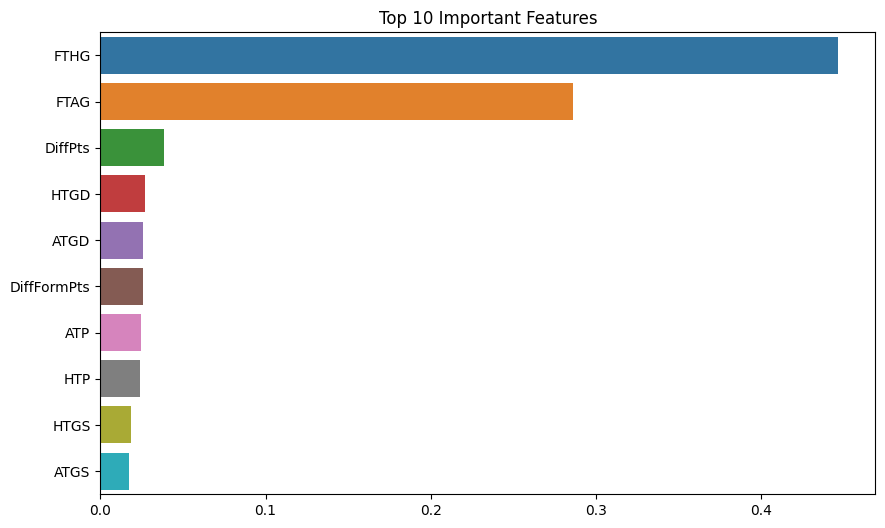

Accuracy with top features: 0.9970760233918129


In [6]:
# 1️ Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 2️ Use the loaded data
df = data.copy()  # just to simplify naming

# 3️ Encode Target Column
le = LabelEncoder()
df['FTR'] = le.fit_transform(df['FTR'])  
# Example encoding: H -> 1, NH/N/D -> 0

# 4️ Separate Features and Target
X = df.drop('FTR', axis=1)  # all columns except target
y = df['FTR']

# 5️ Feature Scaling (optional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6️ Split Train-Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 7️ Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# 8️ Predict on Test Set
y_pred = rf.predict(X_test)

# 9️ Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

#  Feature Importance for Feature Selection
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot top 10 features
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# 10️ Optional: Select Top Features and Retrain
top_features = feature_importances[:10].index
X_train_top = X_train[:, :10]  # selecting top 10 features
X_test_top = X_test[:, :10]

rf_top = RandomForestClassifier(n_estimators=200, random_state=42)
rf_top.fit(X_train, y_train)
y_pred_top = rf_top.predict(X_test)
print("Accuracy with top features:", accuracy_score(y_test, y_pred_top))


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input


In [9]:
# Already loaded
# data = pd.read_excel("/kaggle/input/project/Match Winner.xlsx")
df = data.copy()
print(df.head())


   FTHG  FTAG FTR  HTGS  ATGS  HTGC  ATGC  HTP  ATP  HTFormPts  ...  \
0     4     0   H     0     0     0     0  0.0  0.0          0  ...   
1     4     2   H     0     0     0     0  0.0  0.0          0  ...   
2     1     3  NH     0     0     0     0  0.0  0.0          0  ...   
3     2     2  NH     0     0     0     0  0.0  0.0          0  ...   
4     2     0   H     0     0     0     0  0.0  0.0          0  ...   

   HTLossStreak3  HTLossStreak5  ATWinStreak3  ATWinStreak5  ATLossStreak3  \
0              0              0             0             0              0   
1              0              0             0             0              0   
2              0              0             0             0              0   
3              0              0             0             0              0   
4              0              0             0             0              0   

   ATLossStreak5  HTGD  ATGD  DiffPts  DiffFormPts  
0              0   0.0   0.0      0.0          0.0 

In [10]:
le = LabelEncoder()
df['FTR'] = le.fit_transform(df['FTR'])  # H -> 1, NH -> 0


In [11]:
X = df.drop('FTR', axis=1)
y = df['FTR']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [14]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Fix for input_dim warning
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])


In [15]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [16]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6852 - loss: 0.6137 - val_accuracy: 0.9680 - val_loss: 0.2497
Epoch 2/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9448 - loss: 0.2159 - val_accuracy: 0.9963 - val_loss: 0.0581
Epoch 3/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9857 - loss: 0.0771 - val_accuracy: 0.9982 - val_loss: 0.0201
Epoch 4/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9924 - loss: 0.0354 - val_accuracy: 1.0000 - val_loss: 0.0090
Epoch 5/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9952 - loss: 0.0229 - val_accuracy: 0.9991 - val_loss: 0.0049
Epoch 6/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9968 - loss: 0.0140 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 7/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9968 - loss: 0.0119 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 8/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9973 - loss: 0.0093 - val_accuracy: 1.

In [17]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 1.0
Confusion Matrix:
 [[634   0]
 [  0 734]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       634
           1       1.00      1.00      1.00       734

    accuracy                           1.00      1368
   macro avg       1.00      1.00      1.00      1368
weighted avg       1.00      1.00      1.00      1368



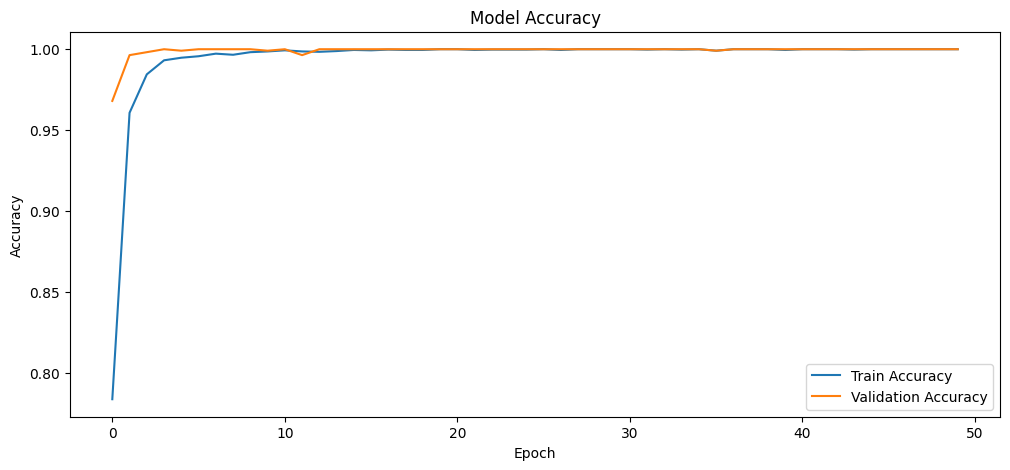

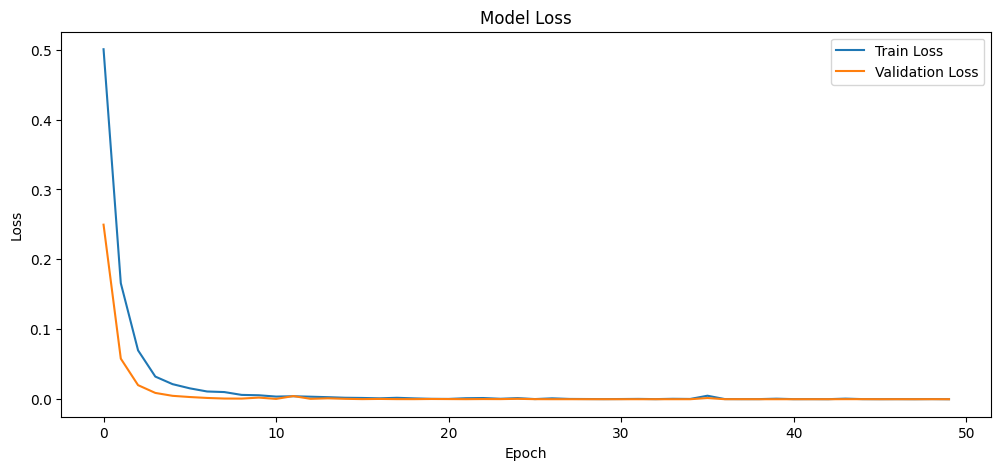

In [18]:
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
